In [5]:
from kmodes.kprototypes import KPrototypes
import pandas as pd

# Example dataset with numerical and categorical features
data = pd.DataFrame({
    'TotalSpend': [100, 500, 1500, 200, 800],
    'PurchaseFrequency': [2, 8, 15, 3, 10],
    'Region': ['North', 'South', 'East', 'West', 'North'],
    'PreferredChannel': ['Online', 'In-Store', 'Online', 'In-Store', 'Online']
})

# Step 1: Preprocess the dataset
# The K-Prototypes algorithm can handle mixed data directly, but categorical data needs to be converted to strings
data['Region'] = data['Region'].astype(str)
data['PreferredChannel'] = data['PreferredChannel'].astype(str)

# Step 2: Convert the dataset into a NumPy array
# The algorithm requires the data as a NumPy array
data_array = data.values

# Step 3: Apply the K-Prototypes algorithm
# Define the indices of categorical columns (starting from 0)
categorical_columns = [2, 3]  # 'Region' and 'PreferredChannel'

# Fit the K-Prototypes model
kproto = KPrototypes(n_clusters=2, random_state=42)
clusters = kproto.fit_predict(data_array, categorical=categorical_columns)

# Step 4: Add cluster labels back to the original dataset
data['Cluster'] = clusters

# Step 5: Analyze the clusters
print("Cluster centroids:")
for idx, centroid in enumerate(kproto.cluster_centroids_):
    print(f"Cluster {idx}: {centroid}")

print("\nClustered Data:")
print(data)

Cluster centroids:
Cluster 0: ['1500.0' '15.0' 'East' 'Online']
Cluster 1: ['400.0' '5.75' 'North' 'In-Store']

Clustered Data:
   TotalSpend  PurchaseFrequency Region PreferredChannel  Cluster
0         100                  2  North           Online        1
1         500                  8  South         In-Store        1
2        1500                 15   East           Online        0
3         200                  3   West         In-Store        1
4         800                 10  North           Online        1


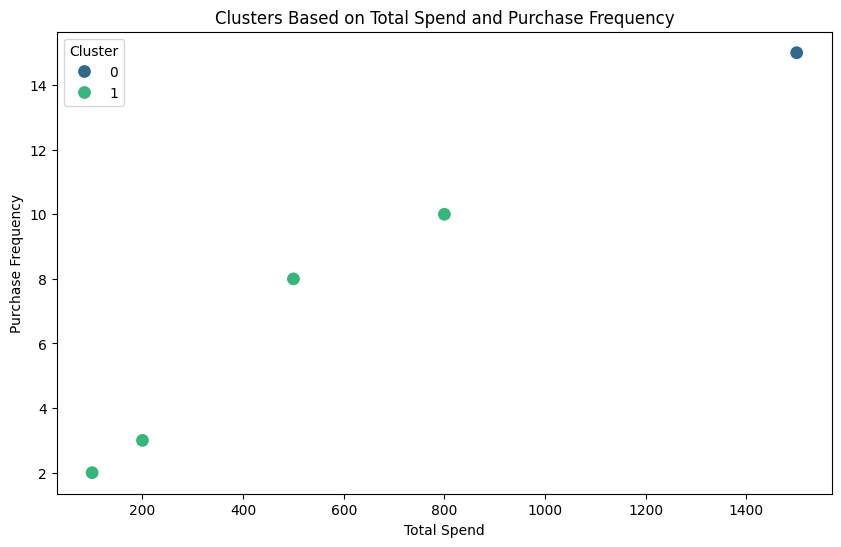

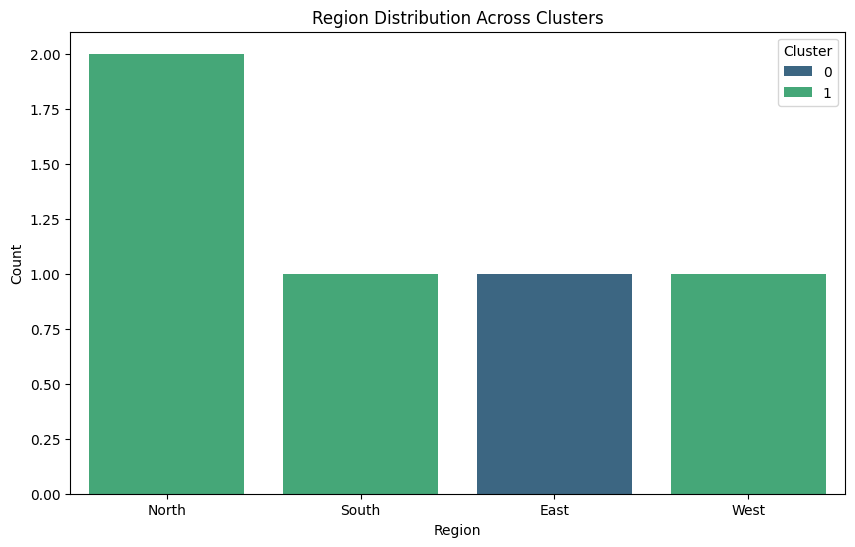

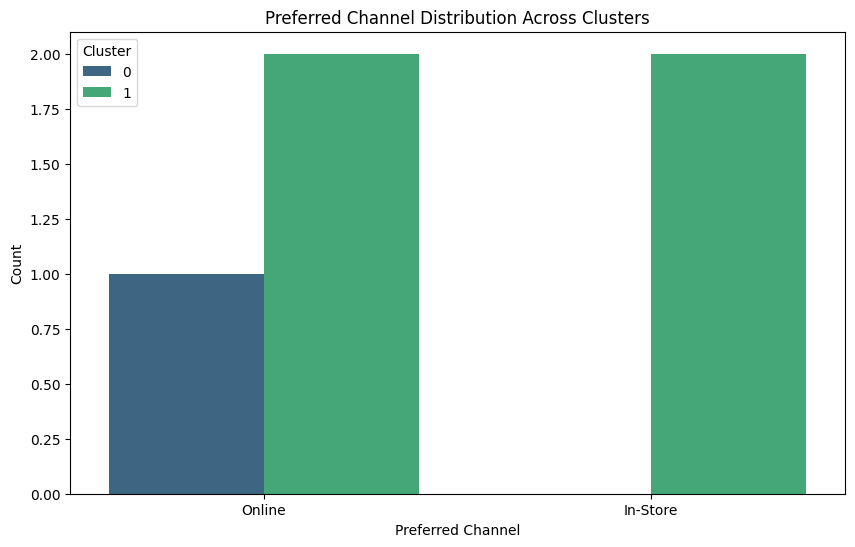

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of TotalSpend vs PurchaseFrequency, color-coded by cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=data['TotalSpend'],
    y=data['PurchaseFrequency'],
    hue=data['Cluster'],
    palette='viridis',
    s=100
)
plt.title('Clusters Based on Total Spend and Purchase Frequency')
plt.xlabel('Total Spend')
plt.ylabel('Purchase Frequency')
plt.legend(title='Cluster')
plt.show()

# Bar chart for categorical features
# Region distribution by cluster
plt.figure(figsize=(10, 6))
sns.countplot(
    x='Region',
    hue='Cluster',
    data=data,
    palette='viridis'
)
plt.title('Region Distribution Across Clusters')
plt.xlabel('Region')
plt.ylabel('Count')
plt.legend(title='Cluster')
plt.show()

# Preferred Channel distribution by cluster
plt.figure(figsize=(10, 6))
sns.countplot(
    x='PreferredChannel',
    hue='Cluster',
    data=data,
    palette='viridis'
)
plt.title('Preferred Channel Distribution Across Clusters')
plt.xlabel('Preferred Channel')
plt.ylabel('Count')
plt.legend(title='Cluster')
plt.show()